# Midterm Project
[Project Guidelines: Summer Academy NPS Data](https://docs.google.com/document/d/11v_d1bkFbTM4N3WU6JAbdR_9_eUChrN32-mdQ9zKaOw/preview)

### Important Links
- [Exploratory Data Analysis in Pandas](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)

In [377]:
# Pandas is a library for basic data analysis
import pandas as pd

# NumPy is a library for advanced mathematical computation
import numpy as np

# MatPlotLib is a library for basic data visualization
import matplotlib.pyplot as plt

# SeaBorn is a library for advanced data visualization
import seaborn as sns

FILEPATH = "survey_midterm_datasets/2017/Student Feedback Surveys-Superview.csv"
df = pd.read_csv(FILEPATH)
df.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,Just right
1,36,Los Angeles,Apps,Week 1,4,A little too fast
2,117,San Francisco,Games,Week 1,4,Way too slow
3,253,NaN,NaN,Week 2,4,A little too fast
4,350,New York City,"Apps, Explorer",Week 1,4,Just right


## Description of Problem
Clean and investigate Make School NPS data to find interesting and actionable trends that help inform decision-makers. Create a presentation in a Jupyter Notebook using data visualizations and other techniques that allow non-technical team members to understand your findings. 

### 1. Analyze Dataset

In [378]:
def analyze_dataset(df):
    print("\n------------------------------\nINFO\n------------------------------")
    df.info() #info of datasets: (range), column's (count, names, non-null counts, data types), memory usage
    print("\n------------------------------\nCOLUMN'S UNIQUE VALUES COUNT\n------------------------------")
    print(df.nunique()) #check how many unique values each columns has
    # df["Rating (Num)"].value_counts() #check what those unique values in the columns are and their counts
    print("\n------------------------------\nCOLUMNS\n------------------------------")
    for i, column_name in enumerate(df.columns):
        print(f"\nColumn #{i}: {column_name}")
        print(df.T.stack()[column_name].value_counts())
# analyze_dataset(df)

### 2. Clean Dataset

### 2a. Specify Proper Data Types

In [379]:
# ------------------------------
# COLUMN'S UNIQUE VALUES COUNT
# ------------------------------
# ID                 1453
# Location             12
# Track                 5
# Week                  8
# Rating (Num)         11
# Schedule Pacing       5

df['Location'] = df['Location'].astype(str) #convert column's values to string
df['Track'] = df['Track'].astype(str)
df['Week'] = df['Week'].astype(str)
df['Rating (Num)'] = df['Rating (Num)'].astype(str)
df['Schedule Pacing'] = df['Schedule Pacing'].astype(str)

print("Note Info's 'non-null' increased because nan values began showing")
# analyze_dataset(df)

Note Info's 'non-null' increased because nan values began showing


### 2b. Specify Values that should be converted to NaN

In [380]:
# df = pd.read_csv("train.csv", usecols= ["PassengerId", "Survived", "Pclass"])  #only use columns we want
# df = pd.read_csv(FILEPATH, skiprows = 1, na_values = ['no info', '.']) #skip rows

df = pd.read_csv(FILEPATH, na_values = ['#ERROR!', "nan"]) #columns that has strings in na_values will be converted to NaN
# analyze_dataset(df)

### Apply once: change Week values to Int

In [381]:
# Changed 'Week' values from str to Int
# df['Week'] = df.apply(lambda x: int(x['Week'].replace('Week ', '')),axis=1) #change weeks values Week 1, to just 1; turning it to an int
df['Week'].value_counts()

Week 1    288
Week 2    277
Week 3    243
Week 4    193
Week 5    179
Week 6    144
Week 7    120
Week 8      9
Name: Week, dtype: int64

## Background on NPS
Every summer, Make School welcomes hundreds of students into the Summer Academy to study software development and build cool stuff. The management wants to make sure that students continue to be satisfied with their experience as the program scales. The main way we measure this is through **Net Promoter Score (NPS), which is a tool commonly used to measure customer loyalty and promotion**. You’ve seen NPS before if you’ve been asked a question like:
“On a scale of 1 to 10, how likely are you to recommend [X] to a friend or colleague?”

NPS segments all responses between 1 and 10 into three categories based on their sentiment:
- Promoter (9 – 10)
- Passive (7 – 8)
- Detractor (1 – 6)

### To calculate NPS, companies follow these steps:
1. Segment all responses into Promoter, Passive, and Detractor categories.
2. Calculate the percentage of responses in each category out of the total number of responses to the survey.
3. Subtract the Detractors percentage from the Promoters percentage. This is the NPS.

```NPS = (Promoters - Detractors)  (Promoters + Passives + Detractors)```


In [382]:
def get_nps_category(rating):
    if rating >= 9:
        return "Promoter"
    elif rating >= 7:
        return "Passive"
    elif rating < 7:
        return "Detractor"
    else:
        return "Other"

# Create another column named "NPS Category" with values of either Promoter, Passive, Detractor, based on their rating
df["NPS Category"] = df.apply(lambda row: get_nps_category(row["Rating (Num)"]), axis=1)
df.tail()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,NPS Category
1448,1495,New York City,"Apps, Explorer",Week 7,10.0,Just right,Promoter
1449,1496,New York City,"Apps, Explorer",Week 7,8.0,Just right,Passive
1450,1497,New York City,Apps,Week 7,10.0,Just right,Promoter
1451,1498,New York City,"Apps, Explorer",Week 7,1.0,A little too slow,Detractor
1452,1499,New York City,Apps,Week 5,8.0,Just right,Passive


In [383]:
# Promoters = 9-10
promoters = df[df['NPS Category'].dropna() == 'Promoter']
len(promoters) / len(df['NPS Category'].dropna())

0.5230557467309016

In [384]:
# Passive = 7-8
passives = df[df['NPS Category'].dropna() == 'Passive']
len(passives) / len(df['NPS Category'].dropna())

0.39160357880247765

In [385]:
# Detractor = 1-6
detractors = df[df['NPS Category'].dropna() == 'Detractor']
len(detractors) / len(df['NPS Category'].dropna())

0.08327598072952512

In [386]:
# NPS = (Promoters - Detractors) / (Promoters + Passives + Detractors)
# NPS = 639 / 1450 * 100
NPS = (len(promoters) - len(detractors)) / (len(promoters) + len(passives) + len(detractors)) * 100
NPS

44.06896551724138

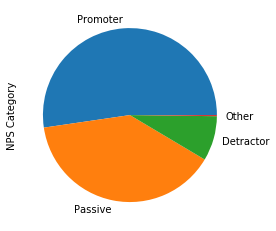

In [387]:
df['NPS Category'].dropna().value_counts().plot(kind='pie')

### Questions to Consider Answering
In this scenario, you’ve just been given access to this data from your boss, with the instructions to “See if you can find anything in here that can help the business.” – This is a very broad set of instructions.  In order to complete this task well, you may want to consider finding answers to the following questions:

- How many more promoters are there than detractors across our 2017 data?
- Which track boasts the best promoter-to-detractor ratio?
- Does the student experience get better the longer that they are enrolled at the Summer Academy?
- Does student satisfaction vary by location?
- What are things we could find here that could “help the business”?
- What sorts of information does this dataset contain?
- What kinds of questions might we be able to answer with this data?
- What kinds of questions can’t we answer with this data?
- What sorts of information might be actionable?
- How can you present your findings in a way that non-technical employees can understand and use to make decisions?

### Data Wrangling Issues to Consider
- CSV files may have header rows
- Collating data from multiple sources
- Introducing new columns/attributes
- Converting data types (string values to integers)
- Converting categorical values (either to integers or one-hot encoding)
- Normalizing values based on different units


#### Which track boasts the best promoter-to-detractor ratio?

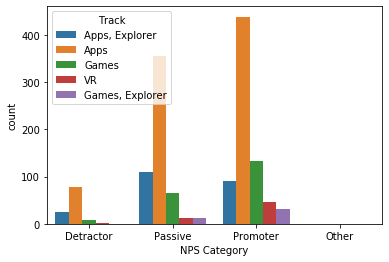

In [388]:
sns.countplot(x="NPS Category", hue="Track", data=df)

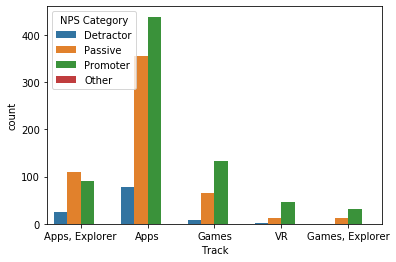

In [389]:
# sns.countplot(x='NPS Category', hue="Track", data=df[(df.Embarked == 'C') & (df.Survived == 1)])
sns.countplot(x='Track', hue="NPS Category", data=df)

In [390]:
Does student satisfaction vary by location?
What kinds of questions might we be able to answer with this data?
What kinds of questions can’t we answer with this data?
What sorts of information might be actionable?

Object `location` not found.
Object `data` not found.
Object `data` not found.
Object `actionable` not found.
